<a href="https://colab.research.google.com/github/willkakuta/treino_machinelearning/blob/main/Treinamento_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [ ]:
import pandas as pd

df= pd.read_csv('advertising.csv')
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [ ]:
df.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


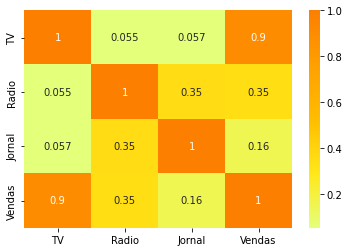

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap='Wistia', annot=True);

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [ ]:
# y = quem eu quero prever
y = df['Vendas']

# x = quem eu vou usar para prever o y, ou seja, o resto do df
x = df[['TV', 'Radio', 'Jornal']]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size= 0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [ ]:
#importando IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criando IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#Treinando IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [ ]:
from sklearn.metrics import r2_score

#fazer previsão IA
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

#comparar previsão IA
print(r2_score(y_teste, previsao_arvoredecisao))
print(r2_score(y_teste, previsao_regressaolinear))


0.945826425167887
0.9158815388777725


#### Visualização Gráfica das Previsões

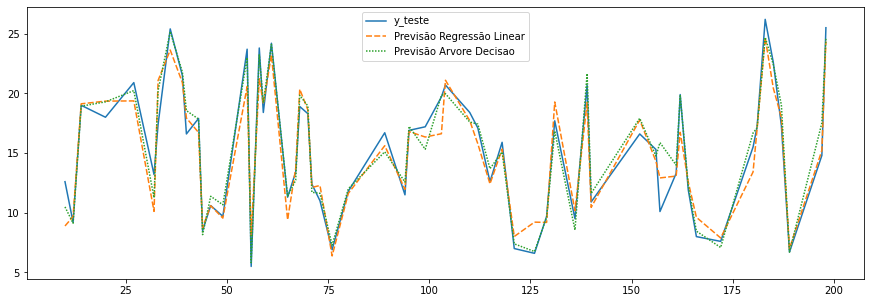

In [ ]:
df_auxiliar = pd.DataFrame()
df_auxiliar['y_teste'] = y_teste
df_auxiliar['Previsão Regressão Linear'] = previsao_regressaolinear
df_auxiliar['Previsão Arvore Decisao'] = previsao_arvoredecisao

plt.figure(figsize=(15,5))
sns.lineplot(data=df_auxiliar);

#### Como fazer uma nova previsão?

In [ ]:
df_novo = pd.read_csv('novos.csv')

df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
previsao = modelo_arvoredecisao.predict(df_novo)

print(previsao)

[ 7.535  8.679 19.723]
